<a href="https://colab.research.google.com/github/yusufemrekatkat/E-Commerce-Analytics-Basic_Projects/blob/main/Pricing_Optimization1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Behavior & Pricing Analysis (Fiyat Esnekliği)

# If we lower the price by X%, we increase demand by Y%, which maximizes revenue at this point.

Price Elasticity of Demand


$$E_d = \frac{\% \Delta Q}{\% \Delta P}$$

Income function:

$R(P) = P \times Q(P)$


Q(P) is demand function dependent on price.

The goal is finding P that maximize the Income; to set the derivative equal to zero:

$$\frac{dR}{dP} = 0$$



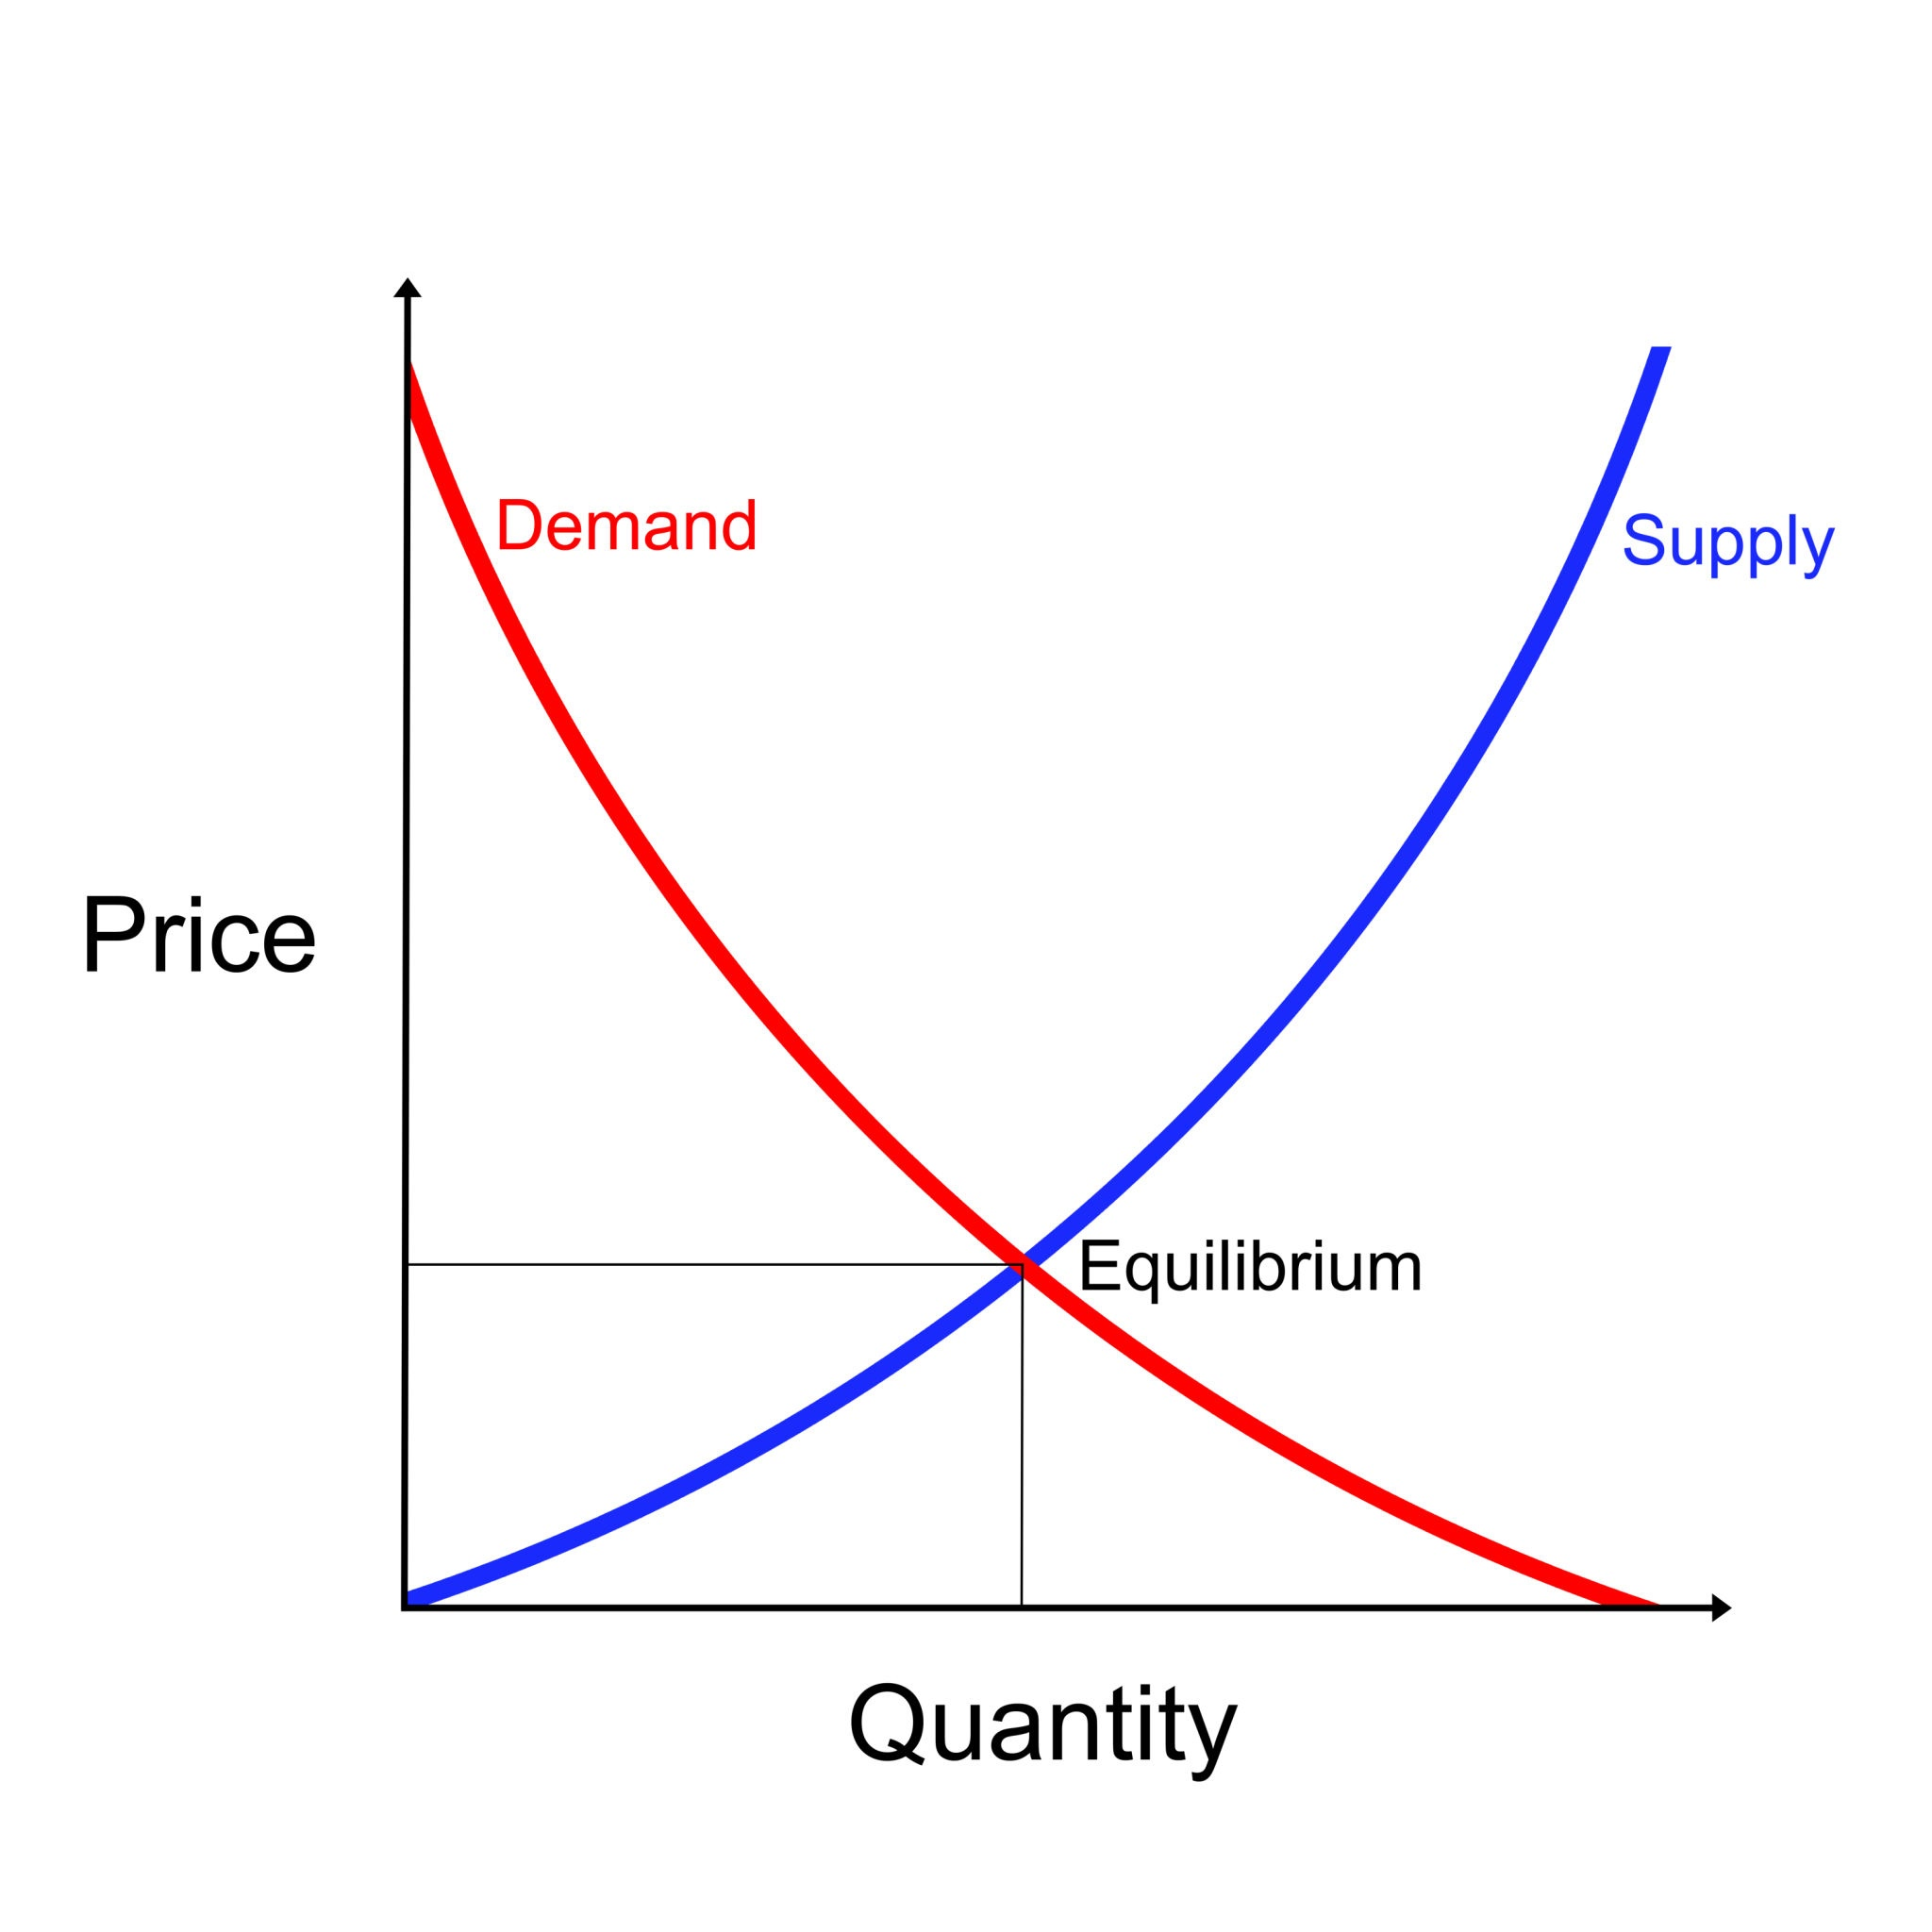

**1: Syntethic Data Generation (Linear Demand Curve)**


As prices rise, demand will decrease, but there will be some "noise" in the data because human behavior isn't 100% rational.

        Price  Quantity_Sold  Total_Revenue
0  106.181018     650.332795   69052.998058
1  192.607146     320.450095   61720.978165
2  159.799091     416.381542   66537.392073
3  139.798773     521.084209   72846.932835
4   73.402796     787.339737   57792.938159


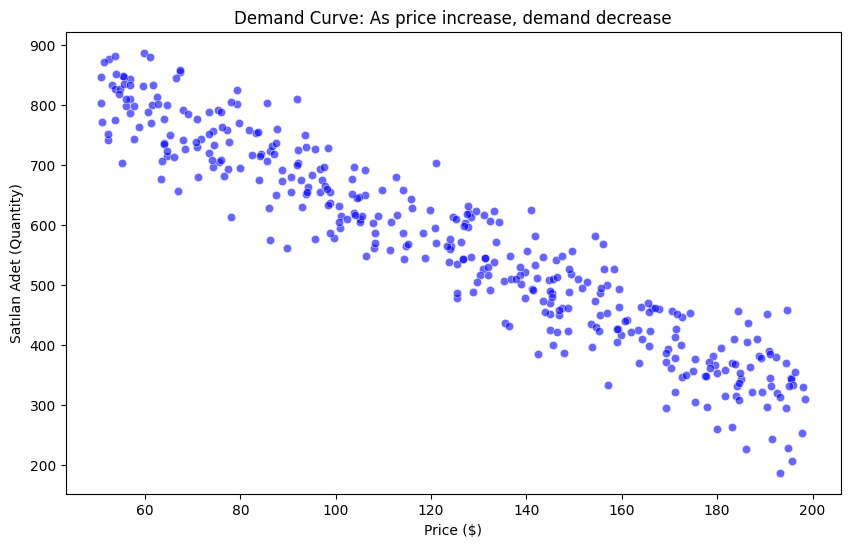

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 1. VERİ ÜRETİMİ (Demand Curve Simulation)
np.random.seed(42)

def generate_sales_data(n_days=365):
    # Fiyatları rastgele belirleyelim (Örn: 50$ ile 200$ arasında değişen fiyatlar)
    prices = np.random.uniform(50, 200, n_days)

    # Talep Fonksiyonu (Q = a - b*P + noise)
    # Varsayım: Fiyat 0 iken talep 1000 olsun (Intercept)
    # Eğim (Slope): Fiyat her 1$ arttığında talep 3 birim düşsün.
    noise = np.random.normal(0, 50, n_days) # Rastgelelik ekle
    quantities = 1000 - (3.5 * prices) + noise

    # Negatif satış olamaz, 0'a eşitle
    quantities = np.clip(quantities, 0, None)

    data = pd.DataFrame({'Price': prices, 'Quantity_Sold': quantities})
    data['Total_Revenue'] = data['Price'] * data['Quantity_Sold']

    return data

df = generate_sales_data()

# Veriyi Görelim
print(df.head())

# Dağılımı Çizdirelim (Talep Eğrisi)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Quantity_Sold', data=df, color='blue', alpha=0.6)
plt.title('Demand Curve: As price increase, demand decrease')
plt.xlabel('Price ($)')
plt.ylabel('Satılan Adet (Quantity)')
plt.show()

**2: Training and Calculating Elasticity**


We will derive the demand curve using **Linear Regression**.

Curve equation: $Q = a - bP$

This equation will tell us how price-sensitive the customer is.

In [9]:
# 2. MODELLEME (Talep Fonksiyonunu Çıkarma)

X = df[['Price']] # Bağımsız Değişken
y = df['Quantity_Sold'] # Bağımlı Değişken

model = LinearRegression()
model.fit(X, y)

# Denklem Katsayıları
intercept = model.intercept_ # Sabit (a)
slope = model.coef_[0] # Eğim (b) - Fiyat Duyarlılığı

print(f"Talep Fonksiyonu: Q = {intercept:.2f} + ({slope:.2f} * P)")
print(f"Yorum: Fiyatı 1$ artırırsak, satışlar ortalama {abs(slope):.2f} adet düşüyor.")

Talep Fonksiyonu: Q = 1004.53 + (-3.52 * P)
Yorum: Fiyatı 1$ artırırsak, satışlar ortalama 3.52 adet düşüyor.


**3: Optimization (Revenue Maximization)**

As a PM, we answering a critical question: "**Which price** we choose for selling this product will maximize the revenue"

------------------------------------------------
OPTIMAL PRICE: $142.51
ESTIMATED MAXIMUM REVENUE: $71595.27
------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


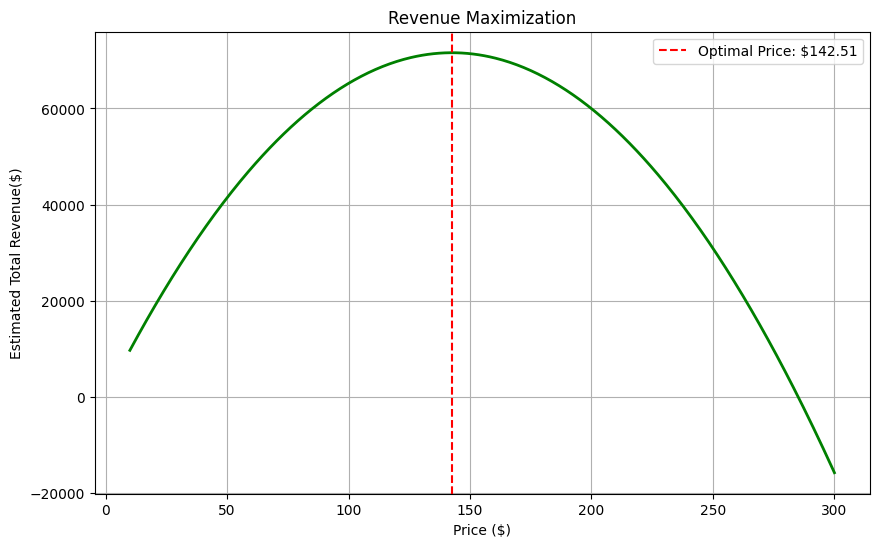

In [10]:
# 3. OPTİMİZASYON (En İyi Fiyatı Bulma)

# Olası tüm fiyatları deneyelim (Test Range)
price_range = np.linspace(10, 300, 500).reshape(-1, 1)

# Modelden bu fiyatlar için tahmini satış adetlerini alalım
predicted_quantities = model.predict(price_range)

# Geliri Hesapla (P * Q)
predicted_revenues = price_range.flatten() * predicted_quantities

# En yüksek geliri bul
max_revenue_index = np.argmax(predicted_revenues)
optimal_price = price_range[max_revenue_index][0]
max_revenue = predicted_revenues[max_revenue_index]

print(f"------------------------------------------------")
print(f"OPTIMAL PRICE: ${optimal_price:.2f}")
print(f"ESTIMATED MAXIMUM REVENUE: ${max_revenue:.2f}")
print(f"------------------------------------------------")

# Grafik: Fiyat vs. Gelir (Ters U Eğrisi - Parabol)
plt.figure(figsize=(10, 6))
plt.plot(price_range, predicted_revenues, color='green', linewidth=2)
plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price: ${optimal_price:.2f}')
plt.title('Revenue Maximization')
plt.xlabel('Price ($)')
plt.ylabel('Estimated Total Revenue($)')
plt.legend()
plt.grid(True)
plt.show()